In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bfriday = pd.read_csv('train.csv')

In [3]:
bfriday.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
bfriday.shape

(550068, 12)

In [5]:
bfriday.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
for column_name in bfriday.columns:
    missing_value = bfriday[column_name].isnull().sum()
    print(column_name, missing_value)

User_ID 0
Product_ID 0
Gender 0
Age 0
Occupation 0
City_Category 0
Stay_In_Current_City_Years 0
Marital_Status 0
Product_Category_1 0
Product_Category_2 173638
Product_Category_3 383247
Purchase 0


In [10]:
total_rows = len(bfriday)
percent_missing_prod2 = bfriday['Product_Category_2'].isnull().sum()/total_rows
percent_missing_prod3 = bfriday['Product_Category_3'].isnull().sum()/total_rows

print('Total rows:{}\nProd2 Missing:{:.0%}\nProd3 Missing:{:.0%}'.format(total_rows, percent_missing_prod2, percent_missing_prod3))

Total rows:550068
Prod2 Missing:32%
Prod3 Missing:70%


In [11]:
unique_categories = []
for col_name in ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
    unique_categories += list(bfriday[col_name].unique())
set(unique_categories)

{nan,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 nan}

In [12]:
b = ['Product_Category_2','Product_Category_3']

In [13]:
for i in b:
    exec("bfriday.%s.fillna(bfriday.%s.value_counts().idxmax(), inplace=True)" %(i,i))

In [14]:
bfriday.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,16.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,16.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,16.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,8.0,16.0,7871


In [15]:
bfriday['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [16]:
bfriday['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [17]:
unique_users = len(bfriday.User_ID.unique())
unique_products = len(bfriday.Product_ID.unique())
print('There are {} unique users and {} unique products'.format(unique_users, unique_products))

There are 5891 unique users and 3631 unique products


In [18]:
for col_name in ['Gender', 'Age', 'Occupation', 'City_Category']:
    print(sorted(bfriday[col_name].unique()))

['F', 'M']
['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
['A', 'B', 'C']


In [19]:
bfriday['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
bfriday['Marital_Status'].unique()

array([0, 1])

In [21]:
for col_name in bfriday.columns:
    print(col_name, len(bfriday[col_name].unique()))

User_ID 5891
Product_ID 3631
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 20
Product_Category_2 17
Product_Category_3 15
Purchase 18105


In [22]:
X = bfriday.drop(["Purchase"], axis=1)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
LE = LabelEncoder()

In [25]:
X = X.apply(LE.fit_transform)

In [26]:
X.Gender = pd.to_numeric(X.Gender)
X.Age = pd.to_numeric(X.Age)
X.Occupation = pd.to_numeric(X.Occupation)
X.City_Category = pd.to_numeric(X.City_Category)
X.Stay_In_Current_City_Years = pd.to_numeric(X.Stay_In_Current_City_Years)
X.Marital_Status = pd.to_numeric(X.Marital_Status)
X.Product_Category_1 = pd.to_numeric(X.Product_Category_1)
X.Product_Category_2 = pd.to_numeric(X.Product_Category_2)
X.Product_Category_3 = pd.to_numeric(X.Product_Category_3)

In [27]:
Y = bfriday["Purchase"]

/Users/prashant/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/prashant/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/prashant/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/prashant/anaconda3/lib/py

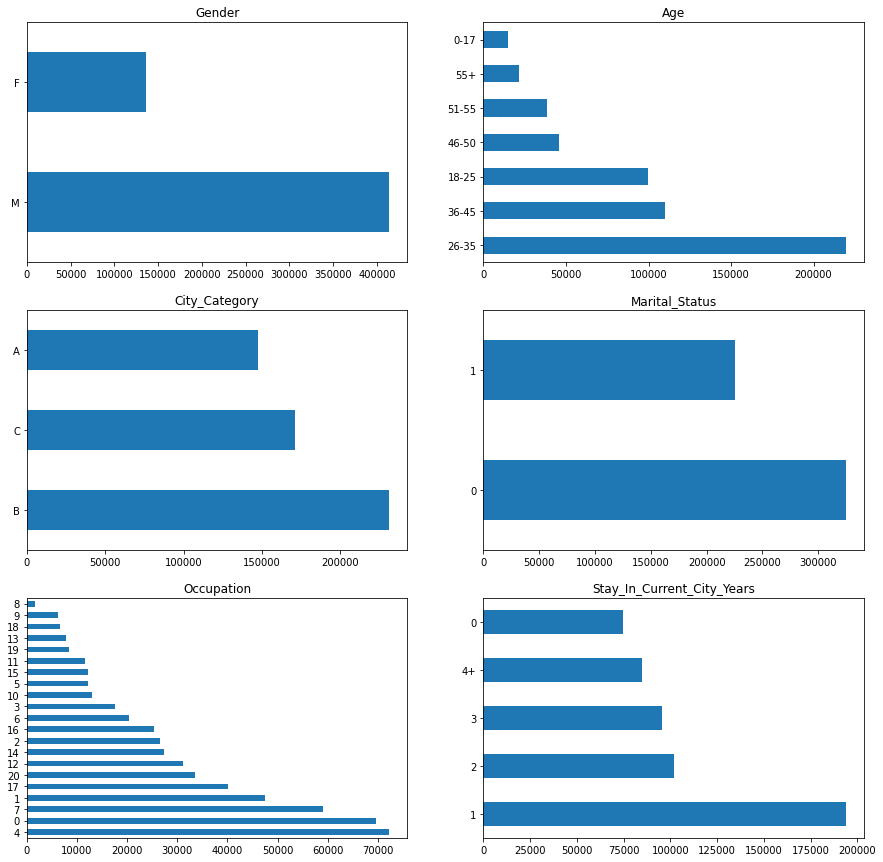

In [28]:
# Various plots for different features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[15, 15])

bfriday['Gender'].value_counts().plot(kind='barh', ax=axes[0,0], title='Gender')
bfriday['Age'].value_counts().plot(kind='barh', ax=axes[0,1], title='Age')
bfriday['City_Category'].value_counts().plot(kind='barh', ax=axes[1,0], title='City_Category')
bfriday['Marital_Status'].value_counts().plot(kind='barh', ax=axes[1,1], title='Marital_Status')
bfriday['Occupation'].value_counts().plot(kind='barh', ax=axes[2,0], title='Occupation')
bfriday['Stay_In_Current_City_Years'].value_counts().plot(kind='barh', ax=axes[2,1], title='Stay_In_Current_City_Years')
plt.show()

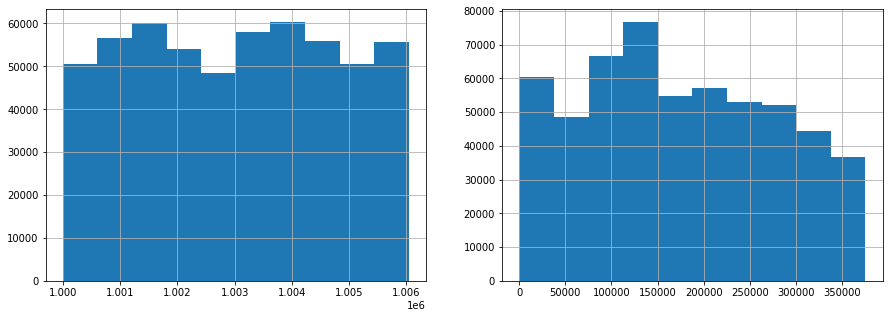

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

bfriday['User_ID'].hist(ax=axes[0])
bfriday['Product_ID'].apply(lambda x:int(x[1:])).hist(ax=axes[1])
plt.show()

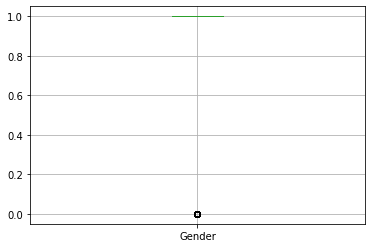

In [30]:
X['Gender'].plot.box(grid='True')
plt.show()

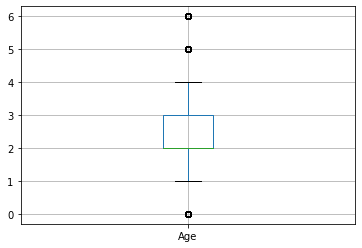

In [31]:
X['Age'].plot.box(grid='True')
plt.show()

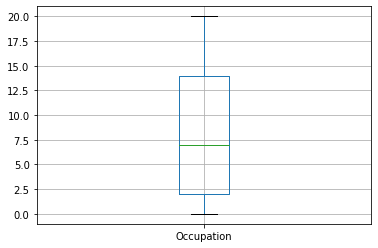

In [32]:
X['Occupation'].plot.box(grid='True')
plt.show()

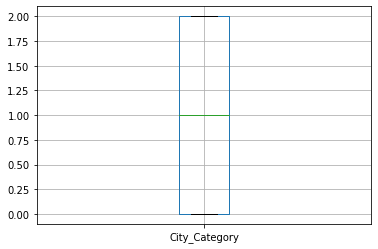

In [33]:
X['City_Category'].plot.box(grid='True')
plt.show()

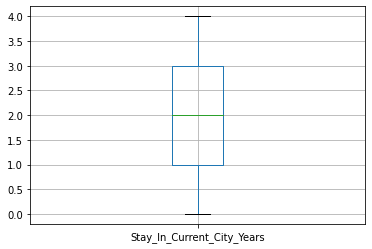

In [34]:
X['Stay_In_Current_City_Years'].plot.box(grid='True')
plt.show()

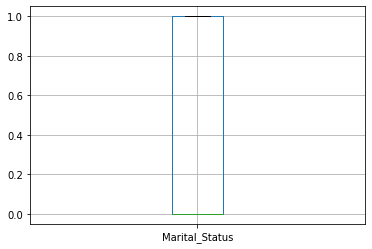

In [35]:
X['Marital_Status'].plot.box(grid='True')
plt.show()

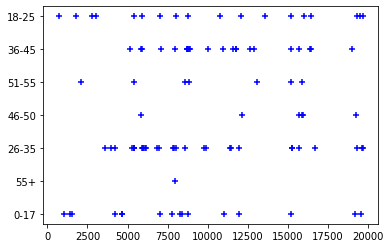

In [36]:
x=bfriday['Purchase'].head(100)
y=bfriday['Age'].head(100)
plt.scatter(x, y, marker='+',color='blue')
plt.show()

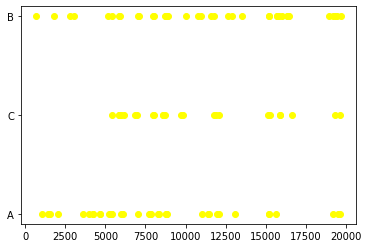

In [37]:
x=bfriday['Purchase'].head(100)
y=bfriday['City_Category'].head(100)
plt.scatter(x, y, marker='o',color='yellow')
plt.show()

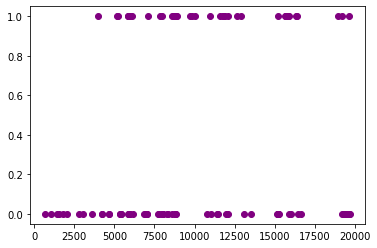

In [38]:
x=bfriday['Purchase'].head(100)
y=bfriday['Marital_Status'].head(100)
plt.scatter(x, y, marker='o',color='purple')
plt.show()

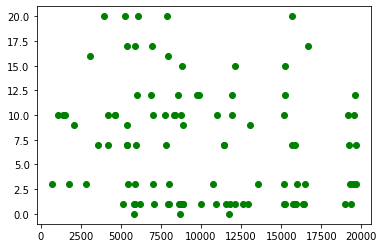

In [39]:
x=bfriday['Purchase'].head(100)
y=bfriday['Occupation'].head(100)
plt.scatter(x, y, marker='o',color='green')
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [41]:
Xs = SS.fit_transform(X)

In [42]:
from sklearn.decomposition import PCA

In [43]:
pc = PCA(4)

In [44]:
principalComponents = pc.fit_transform(X)

In [45]:
pc.explained_variance_ratio_

array([7.35041374e-01, 2.64935995e-01, 1.10061180e-05, 6.21704987e-06])

In [46]:
principalDf = pd.DataFrame(data = principalComponents, columns = ["component 1", "component 2", "component 3", "component 4"])

In [47]:
from sklearn.model_selection import KFold
kf = KFold(20)

In [48]:
for a,b in kf.split(principalDf):
    X_train, X_test = Xs[a],Xs[b]
    y_train, y_test = Y[a],Y[b]

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [51]:
fit1 = lr.fit(X_train,y_train)
fit2 = dtr.fit(X_train,y_train)
fit3 = rfr.fit(X_train,y_train)
fit4 = gbr.fit(X_train,y_train)

In [52]:
print("Accuracy Score of Linear regression on train set",fit1.score(X_train,y_train)*100)
print("Accuracy Score of Decision Tree Regressor on train set",fit2.score(X_train,y_train)*100)
print("Accuracy Score of Random Forests Regressor on train set",fit3.score(X_train,y_train)*100)
print("Accuracy Score of Gradient Boosting Regressor on train set",fit4.score(X_train,y_train)*100)

Accuracy Score of Linear regression on train set 11.829233894211866
Accuracy Score of Decision Tree Regressor on train set 100.0
Accuracy Score of Random Forests Regressor on train set 95.76222575599816
Accuracy Score of Gradient Boosting Regressor on train set 65.49517152859552


In [53]:
print("Accuracy Score of Linear regression on test set",fit1.score(X_test,y_test)*100)
print("Accuracy Score of Decision Tree Regressor on test set",fit2.score(X_test,y_test)*100)
print("Accuracy Score of Random Forests Regressor on test set",fit3.score(X_test,y_test)*100)
print("Accuracy Score of Gradient Boosting Regressor on test set",fit4.score(X_test,y_test)*100)

Accuracy Score of Linear regression on test set 36.8210287243639
Accuracy Score of Decision Tree Regressor on test set 57.287052290173726
Accuracy Score of Random Forests Regressor on test set 76.54682455597245
Accuracy Score of Gradient Boosting Regressor on test set 72.43849411693174


In [54]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

/Users/prashant/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


ModuleNotFoundError: No module named 'pydotplus'

In [170]:
import matplotlib.pyplot as plt
import numpy as np

In [171]:
from sklearn import metrics

In [172]:
print('Linear Regression root mean square error:')
print(np.sqrt(metrics.mean_squared_error(y_test,lr.predict(X_test))))

Linear Regression root mean square error:
4481.03880655721


In [173]:
print('Decision Tree Regressor root mean square error:')
print(np.sqrt(metrics.mean_squared_error(y_test,dtr.predict(X_test))))

Decision Tree Regressor root mean square error:
3669.3728927420134


In [174]:
print('Random Forest Regressor root mean square error:')
print(np.sqrt(metrics.mean_squared_error(y_test,rfr.predict(X_test))))

Random Forest Regressor root mean square error:
2826.3978860375323


In [175]:
print('Gradient Boosting Regressor root mean square error:')
print(np.sqrt(metrics.mean_squared_error(y_test,gbr.predict(X_test))))

Gradient Boosting Regressor root mean square error:
2959.6741624407505


In [176]:
import sklearn
print('Linear Regression R squared value:')
print(sklearn.metrics.r2_score(y_test, lr.predict(X_test)))

Linear Regression R squared value:
0.368210287243639


In [177]:
print('Decision Tree Regressor R squared value:')
print(sklearn.metrics.r2_score(y_test, dtr.predict(X_test)))

Decision Tree Regressor R squared value:
0.5763581686394915


In [178]:
print('Random Forest Regressor R squared value:')
print(sklearn.metrics.r2_score(y_test, rfr.predict(X_test)))

Random Forest Regressor R squared value:
0.7486483506627934


In [179]:
print('Gradient Boosting Regressor R squared value:')
print(sklearn.metrics.r2_score(y_test, gbr.predict(X_test)))

Gradient Boosting Regressor R squared value:
0.7243849411693183
